## Dependecies:
- numpy, pandas, matplotlib, seaborn, sklearn, keras, pydot
# Read in training and testing data and do some housekeeping:
1. Remove duplicate rows
2. Split both datasets into an n-dim feature/design matrix and 1-dim target/predictor vector
3. Manually encode a value to the binary categorical labels of the target/predictor vector

In [5]:
import numpy as np
import pandas as pd


# Read in the data, note: 'education-num' is a proxy for level education
dataTypes = {'age':np.uint8,'workclass':'category', 'fnlwgt':np.uint32, 'education':'category', 'education-num':np.uint8,
             'marital-status':'category', 'occupation':'category', 'relationship':'category', 'race':'category', 'sex':'category', 
             'capital-gain':np.uint32, 'capital-loss':np.uint32, 'hours-per-week':np.uint8, 'native-country':'category',
             'class':'category'}


# Note, we have a mixture of categorical and numerical data,
df_train = pd.read_csv('trainingData/au_train.csv', dtype=dataTypes, skipinitialspace=True, engine='c')
df_test = pd.read_csv('testingData/au_test.csv', dtype=dataTypes, skipinitialspace=True ,engine='c')

# Shuffle training and test set
# df_train = df_train.sample(frac=1)#random_state,weights
# df_test = df_test.sample(frac=1)#random_state,weights   # probably unnecesary


# print(df_train.head())
# print(df_test.head())


# Check for duplicate rows
# print(df_train.drop_duplicates(inplace=True))
# print(df_test.drop_duplicates(inplace=True))


# Check some information and for bad values
# print('\nCheck some prelimiary info and for missing values/NaN:')
# print(df_train.info(),df_test.info())
# print(df_train.describe(),df_test.describe())


# Check for unlabeled categorical features in our DataFrames / misspellings
# print(sorted(list(df_train['workclass'].unique())))
# print(sorted(list(df_train['occupation'].unique())))
# print(sorted(list(df_train['native-country'].unique())))
# print(sorted(list(df_test['workclass'].unique())))
# print(sorted(list(df_test['occupation'].unique())))
# print(sorted(list(df_test['native-country'].unique())))


# I feel `education` and `education-num` is redundant since `education-num` is an ordinally encoded
# version of `education` category that is order by level of education (good), I'll drop the category
# df_train = df_train.drop(columns=['education'])
# df_test = df_test.drop(columns=['education'])


# Check for misspelled labels
# categories = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class']
categories = [catFeat for catFeat in df_train.select_dtypes(include="category")]
for cat in categories:
    a = set(df_train[cat].unique())
    b = set(df_test[cat].unique())
    if len(a.difference(b)):
        print('\nProblem while checking for missing/bad labels:')
        print('Categories in `%s` column of df_train not in df_test:'%cat,a.difference(b))
        print('Categories in `%s` column of df_test not in df_train:'%cat,b.difference(a))

# Note: The test sets target has an extraneous '.' at the end. Handle this manually later
# In addition there is no entry for 'Holand-Netherlands' in the test set so you could argue that data 
# to train on may not be needed
print('\n\n# of entries before dropping Holand-Netherlands:',len(df_train))
# df_train = df_train.replace('Holand-Netherlands',-1)
# print(df_train.query('`native-country`==-1',engine='python'))
df_train = df_train.replace('Holand-Netherlands',np.nan).dropna()
print('# of entries after dropping Holand-Netherlands:',len(df_train))



# Have some unlabeled/missing values (i.e '?') of categorical features in: 
#                'workclass','occupation','native-country'
# in both our training and testing DataFrame (categorical), need to drop those
print('\n\n# of rows in df_train before dropping unlabeled/missing values:',len(df_train))
df_train = df_train.replace('?',np.nan).dropna()
print('# of rows in df_train after dropping unlabeled/missing values:',len(df_train))
print('\n\n# of rows in df_test before dropping unlabeled/missing values:',len(df_test))
df_test = df_test.replace('?',np.nan).dropna()
print('# of rows in df_test after dropping unlabeled/missing values:',len(df_test))


# Split our data into 'X' commonly referred to as the 'Design Matrix' which contains our 
# 'predictors/features' and 'y' containing our prediction labels
y_train = df_train['class'].to_numpy()
X_train = df_train.drop(columns=['class'])

y_test = df_test['class'].to_numpy()
X_test = df_test.drop(columns=['class'])


# Manually encode (easy to do for a 1d array) a numerical value for our predictor which had
# a binary value
#            <=50K  --->    0
#             >50K  --->    1
y_train = np.where(y_train=='>50K',1,0)
y_test = np.where(y_test=='>50K.',1,0) # Handling that extra period '.'


# Check to see the distribution of the predictors in both sets
print('\n\nTraining predictor has',len(y_train),'samples and',np.sum(y_train),'of those samples \
are classified as >50K')
print('% of training sample >50K:',np.sum(y_train)/len(y_train))
print('% of training sample <=50K:',1-np.sum(y_train)/len(y_train))
print('\n\nTesting predictor has',len(y_test),'samples and',np.sum(y_test),'of those samples \
are classified as `>50K`')
print('% of testing sample >50K:',np.sum(y_test)/len(y_test))
print('% of testing sample <=50K:',1-np.sum(y_test)/len(y_test))


Problem while checking for missing/bad labels:
Categories in `native-country` column of df_train not in df_test: {'Holand-Netherlands'}
Categories in `native-country` column of df_test not in df_train: set()

Problem while checking for missing/bad labels:
Categories in `class` column of df_train not in df_test: {'>50K', '<=50K'}
Categories in `class` column of df_test not in df_train: {'>50K.', '<=50K.'}


# of entries before dropping Holand-Netherlands: 32561
# of entries after dropping Holand-Netherlands: 32560


# of rows in df_train before dropping unlabeled/missing values: 32560
# of rows in df_train after dropping unlabeled/missing values: 30161


# of rows in df_test before dropping unlabeled/missing values: 16281
# of rows in df_test after dropping unlabeled/missing values: 15060


Training predictor has 30161 samples and 7508 of those samples are classified as >50K
% of training sample >50K: 0.24893073837074367
% of training sample <=50K: 0.7510692616292564


Testing predicto

# Note: There is more data for people making  <=50K, The target distribution in both training and testing data is the same but imbalanced

## Poke around the data to see if any of the features are skewed or may need scaling
## Visualization

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.colors import LogNorm

groupbySex = X_test.groupby('sex')
colorDict = {'Male':'b','Female':'r'}
for sex,group in groupbySex:
#     print(sex)
#     print(group.describe(),'\n\n')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    fig.patch.set_facecolor('xkcd:gray')
    fig.suptitle(sex)
    group.plot(x='capital-gain',y='age',kind='scatter',ax=axes[0,0], c=colorDict[str(sex)],label=sex,legend=True,alpha=.4)
    group.plot(x='capital-gain',y='education-num',kind='hexbin',ax=axes[0,1],gridsize=15,cmap='viridis',norm=LogNorm())
    group.plot(x='capital-loss',y='age',kind='scatter',ax=axes[1,0],c=colorDict[str(sex)],label=sex,legend=True,alpha=.4)
    group.plot(x='capital-loss',y='education-num',kind='hexbin',ax=axes[1,1],gridsize=15,cmap='viridis',norm=LogNorm())

groupbyRace = X_test.groupby('race')
colorDict = {'White':'r','Asian-Pac-Islander':'g','Amer-Indian-Eskimo':'b','Other':'c','Black':'m'}
for race,group in groupbyRace:
#     print(sex)
#     print(group.describe(),'\n\n')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    fig.patch.set_facecolor('xkcd:gray')
    fig.suptitle(race)
    group.plot(x='capital-gain',y='age',kind='scatter',ax=axes[0,0], c=colorDict[str(race)],label=sex,legend=True,alpha=.4)
    group.plot(x='capital-gain',y='education-num',kind='hexbin',ax=axes[0,1],gridsize=15,cmap='viridis',norm=LogNorm())
    group.plot(x='capital-loss',y='age',kind='scatter',ax=axes[1,0],c=colorDict[str(race)],label=sex,legend=True,alpha=.4)
    group.plot(x='capital-loss',y='education-num',kind='hexbin',ax=axes[1,1],gridsize=15,cmap='viridis',norm=LogNorm())
    
    
# Plot correlation matrix
labelNames = [numFeat for numFeat in X_train.select_dtypes(include=np.number)]
corr = X_train[labelNames[:]].corr()


im = plt.matshow(corr,cmap='viridis',interpolation='bilinear',norm=LogNorm())
plt.xticks(np.arange(corr.shape[1]),labels=labelNames,rotation=45,va='bottom',ha='left')
plt.yticks(np.arange(corr.shape[0]),labels=labelNames)
plt.colorbar(im)
plt.clf()

## Visualization of categorical data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Left plots belong to train and Right plots belong to test
# PLot sample distribution of race for training and test set
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='race', hue='sex',ax=axes[0],data=df_train)
sns.countplot(x='race', hue='sex',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='education-num', hue='race',ax=axes[0],data=df_train)
sns.countplot(x='education-num', hue='race',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(y='age',ax=axes[0],data=df_train)
sns.countplot(y='age',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='education-num',ax=axes[0],data=df_train)
sns.countplot(x='education-num',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(y='occupation', hue='sex',ax=axes[0],data=df_train)
sns.countplot(y='occupation', hue='sex',ax=axes[1],data=df_test)

# The data is still heterogeneous(mixed numerical and categorical data), *scikit-learn* requires explicit conversion of categorical features to numeric values (**preprocessing**).
1. Possibility to scale the numeric features (helpful sometimes i.e convergence)
2. Categorical data will be *OneHotEncoded* to guarantee model sensitivity only to the original category labels

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

# Create the preprocessing pipelines for categorical data of training set.
train_numeric_features = [numFeat for numFeat in X_train.select_dtypes(include=np.number)]
train_numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

train_categorical_features = [catFeat for catFeat in X_train.select_dtypes(include="category")]
train_categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', train_numeric_transformer, train_numeric_features),
        ('cat', train_categorical_transformer, train_categorical_features)],
        remainder='passthrough') # Don't drop untransformed columns

preprocessorNoScale = ColumnTransformer(
    transformers=[
        ('cat', train_categorical_transformer, train_categorical_features)],
        remainder='passthrough') # Don't drop untransformed columns

# Create pipelines with different scales
pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # RobustScale
pipeNoScale = Pipeline(steps=[('preprocessor', preprocessorNoScale)])

X_trainTrans = X_train.copy()
X_testTrans = X_test.copy()
X_trainTransNoScale = X_train.copy()
X_testTransNoScale = X_test.copy()

# Transform the sets
X_trainTrans = pipe.fit_transform(X=X_trainTrans,y=y_train)
X_testTrans = pipe.transform(X=X_testTrans)
X_trainTransNoScale = pipeNoScale.fit_transform(X=X_trainTransNoScale,y=y_train)
X_testTransNoScale = pipeNoScale.transform(X=X_testTransNoScale)

# print(X_trainTrans.shape)
# print(y_train.shape)
# print(X_testTrans.shape)
# print(y_test.shape)

# The data has been preprocessed and transformed, lets play with some models (classification algorithms)

## Logistic Regression

logr score: 0.8479824939491396
logrNoScale score: 0.7909220516561122
0.6558402860548272


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

{'mean_fit_time': array([3.3887496 , 5.0319757 , 6.05924497, 2.85229077, 4.50283465,
       5.54739785]), 'std_fit_time': array([0.35366608, 0.53370016, 0.33920406, 0.1386754 , 0.3016175 ,
       0.57721884]), 'mean_score_time': array([0.00379548, 0.00399714, 0.00399804, 0.00380359, 0.00359802,
       0.00380082]), 'std_score_time': array([3.98828537e-04, 6.31655790e-04, 6.39744180e-07, 4.02781121e-04,
       4.89726234e-04, 3.95394924e-04]), 'param_Cs': masked_array(data=[2, 2, 2, 10, 10, 10],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_cv': masked_array(data=[3, 4, 5, 3, 4, 5],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'Cs': 2, 'cv': 3}, {'Cs': 2, 'cv': 4}, {'Cs': 2, 'cv': 5}, {'Cs': 10, 'cv': 3}, {'Cs': 10, 'cv': 4}, {'Cs': 10, 'cv': 5}], 'split0_test_AUC': array([0.90335111, 0.90327514, 0.90308839, 0.90222013, 0.90229315,
     

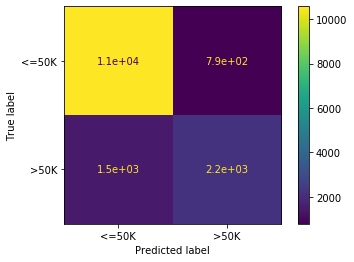

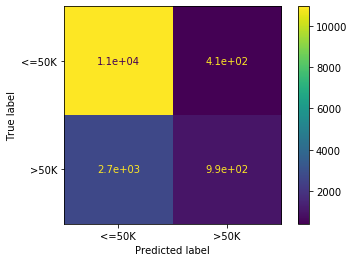

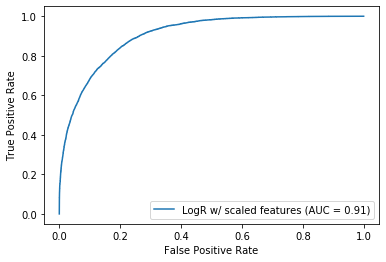

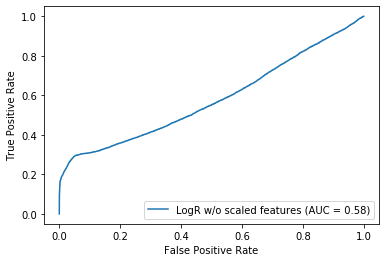

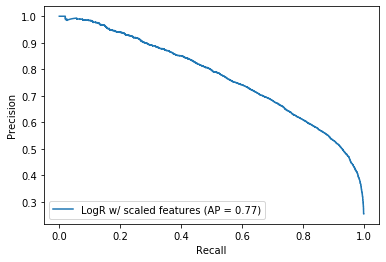

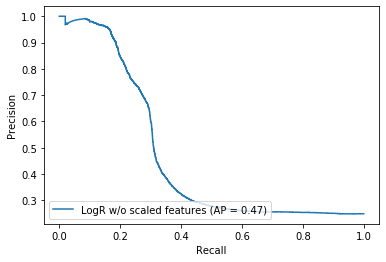

In [8]:
from sklearn.linear_model import LogisticRegressionCV

# RobustScaled features
logr_clf = LogisticRegressionCV(cv=3,random_state=42,solver='lbfgs',max_iter=1000)
logr_clf.fit(X=X_trainTrans,y=y_train,sample_weight=None)
logr_pred = logr_clf.predict(X_testTrans)
print('logr score:',logr_clf.score(X=X_trainTrans,y=y_train,sample_weight=None)) # This is accuracy in getting the label correct


# No scale features
logrNoScale_clf = LogisticRegressionCV(cv=3,random_state=42,solver='lbfgs',max_iter=1000)
logrNoScale_clf.fit(X=X_trainTransNoScale,y=y_train,sample_weight=None)
# logrNoScale_pred = logrNoScale_clf.predict(X_testTransNoScale)
print('logrNoScale score:',logrNoScale_clf.score(X=X_trainTransNoScale,y=y_train,sample_weight=None))
# lr score is mean accuracy value -> Seems decent but remember the classes are imbalanced
# 75% of data is >50K and 25% is <=50K. ACCURACY IS NOT A GOOD METRIC

# Try F1 score metric
# Using our model create array holding its predicitions
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(logr_clf, X_testTrans, y_test, cv=3)
f1Score = f1_score(y_true=y_test,y_pred=y_test_pred)
print(f1Score)

# Makes some plots
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
disp = plot_confusion_matrix(logr_clf,X_testTrans,y_test,display_labels=['<=50K','>50K'])
dispNoScale = plot_confusion_matrix(logrNoScale_clf,X_testTransNoScale,y_test,display_labels=['<=50K','>50K'])

plot_roc_curve(logr_clf,X_trainTrans,y_train,name='LogR w/ scaled features')
plot_roc_curve(logrNoScale_clf,X_trainTransNoScale,y_train,name='LogR w/o scaled features')
plot_precision_recall_curve(logr_clf,X_trainTrans,y_train,name='LogR w/ scaled features')
plot_precision_recall_curve(logrNoScale_clf,X_trainTransNoScale,y_train,name='LogR w/o scaled features')


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

scoring = {'AUC': 'roc_auc', 'F1': make_scorer(f1_score)}
grid = GridSearchCV(estimator=LogisticRegressionCV(solver='lbfgs',random_state=42,max_iter=1000),
                    param_grid={'Cs':[2,10],'cv': [3, 4, 5]},
                    scoring=scoring, refit='AUC', return_train_score=True)

grid.fit(X_trainTrans, y_train)
results = grid.cv_results_
print(results)

## Stochastic Gradient Descent (SGD)

In [ ]:
from sklearn.linear_model import SGDClassifier

# Scaled features
sgd_clf = SGDClassifier(loss='hinge',max_iter=1000,shuffle=True,random_state=42)
sgd_clf.fit(X_trainTrans,y_train,sample_weight=None)
sgd_pred = sgd_clf.predict(X_testTrans)
print('SGD score:',sgd_clf.score(X_testTrans,y_test))


from sklearn.model_selection import cross_val_score
print('\nAccuracy 3-fold cross validation:')
print(cross_val_score(sgd_clf, X_trainTrans, y_train, cv=3,scoring='accuracy')) # Mediocre improvement using linear SVM model

from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(sgd_clf, X_testTrans, y_test, cv=3)

# Makes some plots
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
plot_roc_curve(sgd_clf,X_trainTrans,y_train)

## Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

# Scaled features
per_clf = Perceptron(tol=1e-3,shuffle=True,random_state=42)
per_clf.fit(X_trainTrans,y_train,sample_weight=None)
per_clf.score(X_trainTrans,y_train,sample_weight=None)

from sklearn.model_selection import cross_val_score
print('\nAccuracy 3-fold cross validation:')
print(cross_val_score(per_clf, X_trainTrans, y_train, cv=3,scoring='accuracy')) # Mediocre improvement using linear SVM model

from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(per_clf, X_testTrans, y_test, cv=3)

from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
disp = plot_confusion_matrix(per_clf,X_testTrans,y_test,display_labels=['<=50K','>50K'])
plot_roc_curve(per_clf,X_testTrans,y_test,name='Perceptron w/ scaled features')

# Keras (Deep Learning)

## Multilayer Perceptron (for binary classification)

Train on 20207 samples, validate on 9954 samples
Epoch 1/100
20207/20207 [==============================] - 1s 26us/step - loss: 29.0152 - tp: 1511.0000 - fp: 1681.0000 - tn: 13549.0000 - fn: 3466.0000 - accuracy: 0.7453 - precision: 0.4734 - recall: 0.3036 - auc: 0.6710 - val_loss: 7.2928 - val_tp: 638.0000 - val_fp: 336.0000 - val_tn: 7087.0000 - val_fn: 1893.0000 - val_accuracy: 0.7761 - val_precision: 0.6550 - val_recall: 0.2521 - val_auc: 0.7883
Epoch 2/100
20207/20207 [==============================] - 0s 14us/step - loss: 13.9947 - tp: 1564.0000 - fp: 1031.0000 - tn: 14199.0000 - fn: 3413.0000 - accuracy: 0.7801 - precision: 0.6027 - recall: 0.3142 - auc: 0.7689 - val_loss: 2.4893 - val_tp: 926.0000 - val_fp: 424.0000 - val_tn: 6999.0000 - val_fn: 1605.0000 - val_accuracy: 0.7962 - val_precision: 0.6859 - val_recall: 0.3659 - val_auc: 0.8664
Epoch 3/100
20207/20207 [==============================] - 0s 14us/step - loss: 7.3575 - tp: 1897.0000 - fp: 1182.0000 - tn: 14048.0000 - f

20207/20207 [==============================] - 0s 15us/step - loss: 0.3789 - tp: 2480.0000 - fp: 1285.0000 - tn: 13945.0000 - fn: 2497.0000 - accuracy: 0.8128 - precision: 0.6587 - recall: 0.4983 - auc: 0.8749 - val_loss: 0.3600 - val_tp: 1257.0000 - val_fp: 346.0000 - val_tn: 7077.0000 - val_fn: 1274.0000 - val_accuracy: 0.8373 - val_precision: 0.7842 - val_recall: 0.4966 - val_auc: 0.8920
Epoch 22/100
20207/20207 [==============================] - 0s 15us/step - loss: 0.3859 - tp: 2501.0000 - fp: 1263.0000 - tn: 13967.0000 - fn: 2476.0000 - accuracy: 0.8150 - precision: 0.6645 - recall: 0.5025 - auc: 0.8732 - val_loss: 0.3600 - val_tp: 1258.0000 - val_fp: 346.0000 - val_tn: 7077.0000 - val_fn: 1273.0000 - val_accuracy: 0.8374 - val_precision: 0.7843 - val_recall: 0.4970 - val_auc: 0.8920
Epoch 23/100
20207/20207 [==============================] - 0s 15us/step - loss: 0.3901 - tp: 2453.0000 - fp: 1260.0000 - tn: 13970.0000 - fn: 2524.0000 - accuracy: 0.8127 - precision: 0.6607 - recal

20207/20207 [==============================] - 0s 14us/step - loss: 0.4132 - tp: 2434.0000 - fp: 1218.0000 - tn: 14012.0000 - fn: 2543.0000 - accuracy: 0.8139 - precision: 0.6665 - recall: 0.4890 - auc: 0.8733 - val_loss: 0.3600 - val_tp: 1258.0000 - val_fp: 347.0000 - val_tn: 7076.0000 - val_fn: 1273.0000 - val_accuracy: 0.8373 - val_precision: 0.7838 - val_recall: 0.4970 - val_auc: 0.8921
Epoch 42/100
20207/20207 [==============================] - 0s 14us/step - loss: 0.3822 - tp: 2497.0000 - fp: 1229.0000 - tn: 14001.0000 - fn: 2480.0000 - accuracy: 0.8164 - precision: 0.6702 - recall: 0.5017 - auc: 0.8749 - val_loss: 0.3600 - val_tp: 1258.0000 - val_fp: 347.0000 - val_tn: 7076.0000 - val_fn: 1273.0000 - val_accuracy: 0.8373 - val_precision: 0.7838 - val_recall: 0.4970 - val_auc: 0.8921
Epoch 43/100
20207/20207 [==============================] - 0s 14us/step - loss: 0.4095 - tp: 2464.0000 - fp: 1229.0000 - tn: 14001.0000 - fn: 2513.0000 - accuracy: 0.8148 - precision: 0.6672 - recal

20207/20207 [==============================] - 0s 14us/step - loss: 0.3823 - tp: 2497.0000 - fp: 1243.0000 - tn: 13987.0000 - fn: 2480.0000 - accuracy: 0.8158 - precision: 0.6676 - recall: 0.5017 - auc: 0.8722 - val_loss: 0.3600 - val_tp: 1258.0000 - val_fp: 347.0000 - val_tn: 7076.0000 - val_fn: 1273.0000 - val_accuracy: 0.8373 - val_precision: 0.7838 - val_recall: 0.4970 - val_auc: 0.8921
Epoch 62/100
20207/20207 [==============================] - 0s 14us/step - loss: 0.3803 - tp: 2508.0000 - fp: 1278.0000 - tn: 13952.0000 - fn: 2469.0000 - accuracy: 0.8146 - precision: 0.6624 - recall: 0.5039 - auc: 0.8742 - val_loss: 0.3600 - val_tp: 1258.0000 - val_fp: 347.0000 - val_tn: 7076.0000 - val_fn: 1273.0000 - val_accuracy: 0.8373 - val_precision: 0.7838 - val_recall: 0.4970 - val_auc: 0.8921
Epoch 63/100
20207/20207 [==============================] - 0s 14us/step - loss: 0.4018 - tp: 2478.0000 - fp: 1219.0000 - tn: 14011.0000 - fn: 2499.0000 - accuracy: 0.8160 - precision: 0.6703 - recal

20207/20207 [==============================] - 0s 14us/step - loss: 0.3863 - tp: 2499.0000 - fp: 1244.0000 - tn: 13986.0000 - fn: 2478.0000 - accuracy: 0.8158 - precision: 0.6676 - recall: 0.5021 - auc: 0.8729 - val_loss: 0.3600 - val_tp: 1258.0000 - val_fp: 347.0000 - val_tn: 7076.0000 - val_fn: 1273.0000 - val_accuracy: 0.8373 - val_precision: 0.7838 - val_recall: 0.4970 - val_auc: 0.8921
Epoch 82/100
20207/20207 [==============================] - 0s 14us/step - loss: 0.3924 - tp: 2493.0000 - fp: 1242.0000 - tn: 13988.0000 - fn: 2484.0000 - accuracy: 0.8156 - precision: 0.6675 - recall: 0.5009 - auc: 0.8749 - val_loss: 0.3600 - val_tp: 1258.0000 - val_fp: 347.0000 - val_tn: 7076.0000 - val_fn: 1273.0000 - val_accuracy: 0.8373 - val_precision: 0.7838 - val_recall: 0.4970 - val_auc: 0.8921
Epoch 83/100
20207/20207 [==============================] - 0s 14us/step - loss: 0.3843 - tp: 2460.0000 - fp: 1226.0000 - tn: 14004.0000 - fn: 2517.0000 - accuracy: 0.8148 - precision: 0.6674 - recal

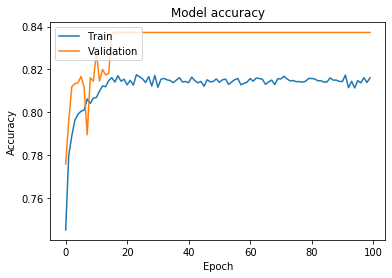

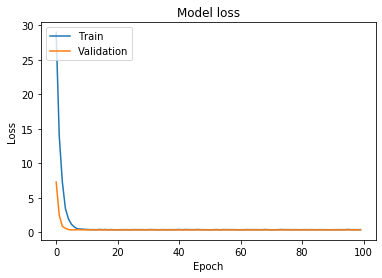

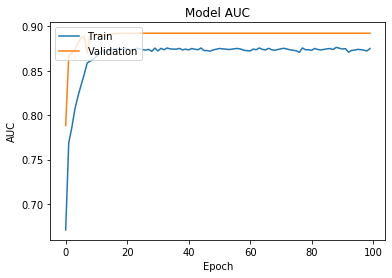

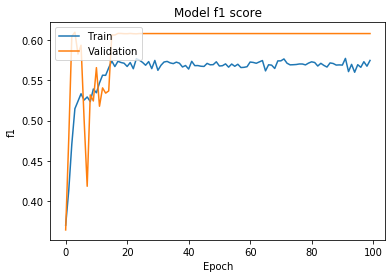

In [7]:
import matplotlib.pyplot as plt
# print(X_trainTrans.shape)


from keras.layers import Input, Dense, Dropout
# For a single-input model with 1 class (binary classification):
# A layer instance is callable on a tensor, and returns a tensor
inputs = Input(shape=(X_trainTrans.shape[1],)) # This returns a tensor
input_layer = Dense(64, activation='relu')(inputs)
drop_1 = Dropout(0.5)(input_layer)
hidden_layer = Dense(64, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(drop_2) #softmax, tanh


# Create the model with Input layer and the Dense/Droput layers
from keras.models import Model
model = Model(inputs=inputs, outputs=output_layer)


# metrics to keep track of over every epoch
from keras import metrics
METRICS = [
    metrics.TruePositives(name='tp'),
    metrics.FalsePositives(name='fp'),
    metrics.TrueNegatives(name='tn'),
    metrics.FalseNegatives(name='fn'), 
    metrics.BinaryAccuracy(name='accuracy',threshold=0.5),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
]
# For a binary classification problem
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',#rmsprop,sgd
              metrics=METRICS)


# Train the model, iterating on the data in batches of 'n' samples
num_epochs = 100
size_of_batch = 200
validation_data = None #(X_testTrans,y_test)
from keras.callbacks import ReduceLROnPlateau # Reduce the learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, 
                  mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
history = model.fit(x=X_trainTrans, y=y_train, epochs=num_epochs, batch_size=size_of_batch,
                    validation_data=validation_data, validation_split=.33,
                    shuffle=True, callbacks=[reduce_lr])#class_weight


# Evaluate model over the test set
test_sample_weight = None
loss_and_metrics = model.evaluate(x=X_testTrans, y=y_test, batch_size=size_of_batch, sample_weight=None)
y_pred =  model.predict(x=X_testTrans)
lossMetricsLegible = [[metricName,metricValue] for metricName, metricValue in zip(history.history.keys(), loss_and_metrics)]

print('\n\nModel performance metrics on the test:')
for ind in range(len(lossMetricsLegible)):
    print('\t',lossMetricsLegible[ind][0],':',lossMetricsLegible[ind][1])
print('\n\n')

from keras.utils import plot_model
plot_model(model, to_file='savedModel/MLPmodel.png')


# print(history.history.keys()) #prints keys
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/modelAccuracy.png')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/modelLoss.png')
plt.show()

# Plot training & validation AUC values
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/modelAUC.png')
plt.show()

f1 = 2*(np.array(history.history['precision'])*np.array(history.history['recall'])) / \
    (np.array(history.history['precision']) + np.array(history.history['recall']))
val_f1 = 2*(np.array(history.history['val_precision'])*np.array(history.history['val_recall'])) / \
    (np.array(history.history['val_precision']) + np.array(history.history['val_recall']))    
# Plot training & validation f1 values
plt.plot(f1)
plt.plot(val_f1)
plt.title('Model f1 score')
plt.ylabel('f1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/modelf1.png')
plt.show()



# Save the weights
model.save_weights('savedModel/MLPmodel_weights.h5')

# Save the model architecture
with open('savedModel/MLPmodel_architecture.json', 'w') as f:
    f.write(model.to_json())

## Load MLP model and tune Hyperparameters

In [ ]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('savedModel/MLPmodel_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('savedModel/MLPmodel_weights.h5')